# Training ANN for gesture recognition

In [1]:
# -*- coding: utf-8 -*-
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection as mod_sel

RANDOM_SEED = 10
NUM_CLASSES = 7

# path to training set
full_dataset_path = os.path.join("../full_csv_data/full_data.csv")


In [2]:

# reading full dataset
full_dataset = pd.read_csv(full_dataset_path)
full_dataset.head()


,WRIST_x,WRIST_y,THUMB_CMC_x,THUMB_CMC_y,THUMB_MCP_x,THUMB_MCP_y,THUMB_IP_x,THUMB_IP_y,THUMB_TIP_x,THUMB_TIP_y,...,RING_FINGER_TIP_y,PINKY_MCP_x,PINKY_MCP_y,PINKY_PIP_x,PINKY_PIP_y,PINKY_DIP_x,PINKY_DIP_y,PINKY_TIP_x,PINKY_TIP_y,GESTURE
0,0.587292,0.645778,0.562785,0.610625,0.548883,0.550258,0.556732,0.507832,0.577612,0.487640,...,0.549274,0.633768,0.524244,0.651393,0.467423,0.662765,0.430578,0.671104,0.392935,5.0
1,0.580777,0.661015,0.556497,0.622755,0.543159,0.564763,0.550922,0.519289,0.571730,0.496221,...,0.563129,0.626761,0.529217,0.644878,0.479159,0.654922,0.443597,0.663010,0.405483,5.0
2,0.582599,0.670213,0.557104,0.627109,0.542273,0.563967,0.549945,0.515890,0.571464,0.490607,...,0.563648,0.628615,0.531993,0.647242,0.480551,0.656991,0.444289,0.664524,0.404008,5.0
3,0.584030,0.673258,0.558286,0.625489,0.544291,0.561939,0.552698,0.514165,0.574654,0.488400,...,0.561743,0.629877,0.532089,0.649057,0.482488,0.659226,0.446588,0.667043,0.405972,5.0
4,0.585115,0.667034,0.559267,0.619904,0.545567,0.557655,0.554347,0.512488,0.576199,0.488906,...,0.559021,0.632383,0.529412,0.651403,0.481268,0.661701,0.446572,0.669413,0.405841,5.0


In [3]:

# X - feature vector, y - labels
X = full_dataset.iloc[:, :-1]
y = full_dataset.iloc[:, -1]


In [5]:

# getting train set and set for test and validation
X_train, X_val_and_test, y_train, y_val_and_test = mod_sel.train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# getting validation and test sets
X_test, X_val, y_test, y_val = mod_sel.train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=RANDOM_SEED)



# Model building

In [40]:

# using sequential api for defining tf model
tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2,)),

    tf.keras.layers.Dense(30, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(20, activation='relu'),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [41]:

# model description
tf_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                1290      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 7)                 77        
                                                                 
Total params: 2,197
Trainable params: 2,197
Non-traina

In [13]:

# for nice picture with data, you can ignore it 
tf.keras.utils.plot_model(tf_model, to_file="tf_model.svg", show_shapes=True, dpi=None)


ValueError: Cannot embed the 'svg' image format

In [6]:

# where you safe model
model_save_path = os.path.join("../trained_models/mod3")


In [43]:


# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)



In [44]:


# Model compilation
tf_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [45]:

# model training
history = tf_model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[cp_callback, es_callback]
)


Epoch 1/1000
887/914 [============================>.] - ETA: 0s - loss: 1.0844 - accuracy: 0.6036
Epoch 1: saving model to ../trained_models\mod3
INFO:tensorflow:Assets written to: ../trained_models\mod3\assets
914/914 [==============================] - 3s 3ms/step - loss: 1.0659 - accuracy: 0.6112 - val_loss: 0.2585 - val_accuracy: 0.9420
Epoch 2/1000
885/914 [============================>.] - ETA: 0s - loss: 0.3454 - accuracy: 0.8997
Epoch 2: saving model to ../trained_models\mod3
INFO:tensorflow:Assets written to: ../trained_models\mod3\assets
914/914 [==============================] - 3s 3ms/step - loss: 0.3432 - accuracy: 0.9004 - val_loss: 0.1425 - val_accuracy: 0.9646
Epoch 3/1000
885/914 [============================>.] - ETA: 0s - loss: 0.2452 - accuracy: 0.9309
Epoch 3: saving model to ../trained_models\mod3
INFO:tensorflow:Assets written to: ../trained_models\mod3\assets
914/914 [==============================] - 3s 3ms/step - loss: 0.2445 - accuracy: 0.9311 - val_loss: 0.11

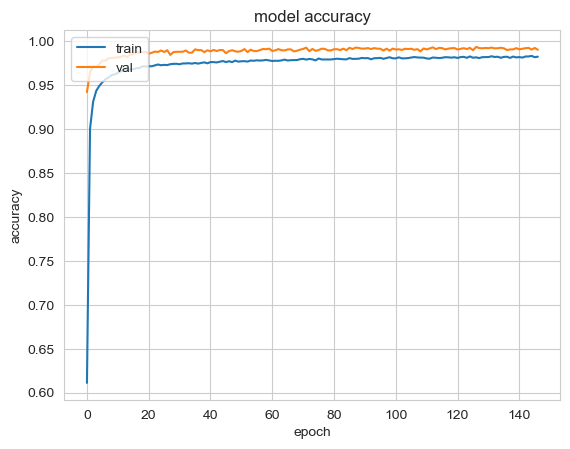

In [46]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


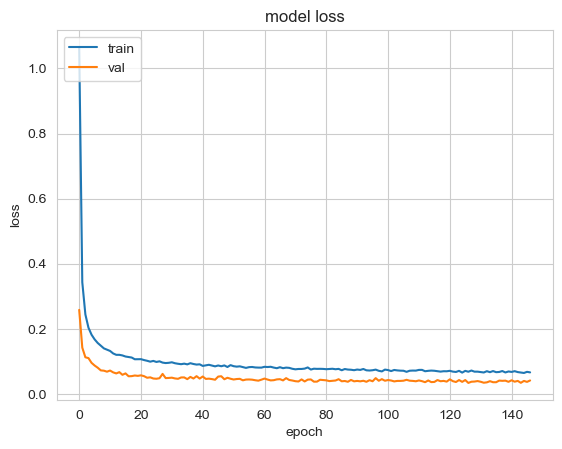

In [47]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [33]:

# Model evaluation
val_loss, val_acc = tf_model.evaluate(X_test, y_test, batch_size=128)


NameError: name 'tf_model' is not defined

In [6]:

model_save_path = os.path.join("../trained_models/mod3")


In [7]:

# Loading the saved model
model = tf.keras.models.load_model(model_save_path)


# Testing - Confusion matrix

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from GestureNumber import GestureNumber

# it worked at first, but then it stopped
# use part later instead
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    labels_names = [GestureNumber(label).name for label in labels]
    labels_names = [" ".join(label.split("_")) for label in labels_names]
    # print(y_pred)
    # print(y_true.shape)
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
    print(df_cmx)
    plt.figure(figsize=(7, 5))

    sns.heatmap(df_cmx, annot=True, fmt="g", square=True)
    # sns.heatmap(df_cmx, annot=True, fmt="g", square=True)
    # ax.set_yticklabels(labels_names)
    # ax.set_yticklabelsrotation()
    # ax.tick_params(labelrotation=1.5)
    plt.yticks(
        [idx + 0.5 for idx in range(len(labels))], labels=labels_names, rotation=1.5
    )
    plt.xticks(
        [idx + 0.5 for idx in range(len(labels))], labels=labels_names, rotation=300
    )
    plt.ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print("Classification Report")
        print(classification_report(y_test, y_pred))


457/457 [==============================] - 0s 794us/step
      0.0   1.0   2.0   3.0   4.0   5.0   6.0
0.0  1795    19    14     1     1    13     2
1.0     9  2832     0     0     0     6     2
2.0     7     1  1859     0     0     0     6
3.0     6     5     0  2148     0     0     1
4.0     0     0     0     0  1867     0    14
5.0    11    41     2     4     0  1969     5
6.0     0     0     0     0     0     0  1979


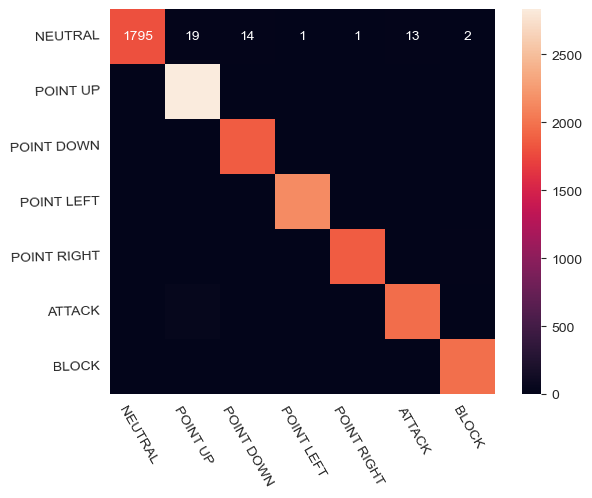

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1845
         1.0       0.98      0.99      0.99      2849
         2.0       0.99      0.99      0.99      1873
         3.0       1.00      0.99      1.00      2160
         4.0       1.00      0.99      1.00      1881
         5.0       0.99      0.97      0.98      2032
         6.0       0.99      1.00      0.99      1979

    accuracy                           0.99     14619
   macro avg       0.99      0.99      0.99     14619
weighted avg       0.99      0.99      0.99     14619


In [14]:

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


457/457 [==============================] - 0s 798us/step


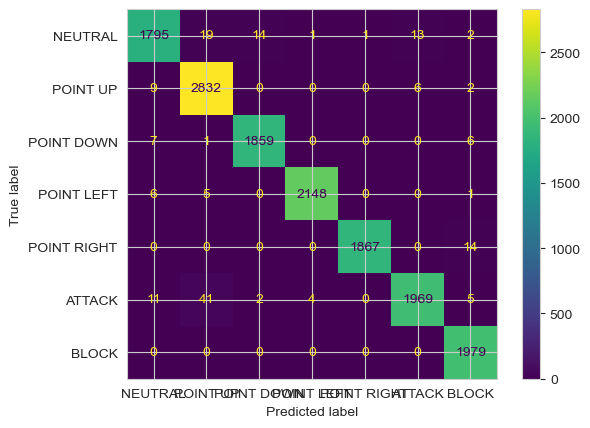

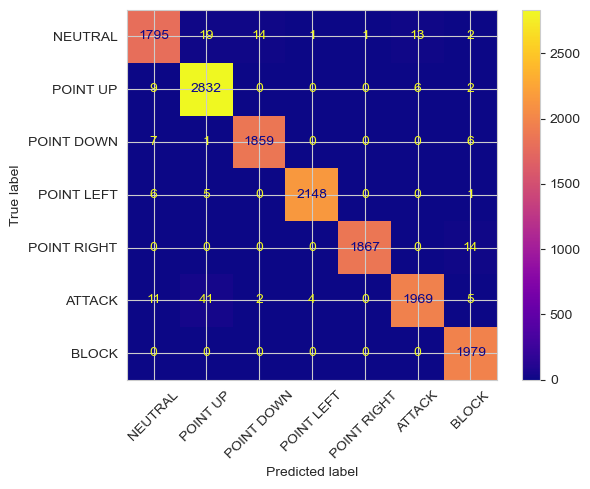

In [20]:

# this part works for printing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

y_true = y_test

labels = sorted(list(set(y_true)))
labels_names = [GestureNumber(label).name for label in labels]
labels_names = [" ".join(label.split("_")) for label in labels_names]

# cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

# disp = ConfusionMatrixDisplay(confusion_matrix=cmx_data, display_labels=labels_names)

disp1 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels_names)

disp1.plot(xticks_rotation=45, values_format='g', cmap='plasma')

plt.show()


## Saving as tflite

In [82]:

tflite_save_path = os.path.join("../trained_models/trained_dnn_models")
tflite_save_path = os.path.join(tflite_save_path, "model4.tflite")



In [83]:

# Transform model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)


INFO:tensorflow:Assets written to: C:\Users\barte\AppData\Local\Temp\tmpxi66cb3p\assets


INFO:tensorflow:Assets written to: C:\Users\barte\AppData\Local\Temp\tmpxi66cb3p\assets


7680